In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [152]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [153]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [154]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [155]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,Channel,int64,2,0,"[1, 2]",0
1,Region,int64,3,0,"[3, 1, 2]",0
2,Fresh,int64,433,0,"[9670, 3, 18044, 8040, 514, 3366, 7149, 5283, ...",0
3,Milk,int64,421,0,"[3045, 1610, 5139, 2428, 3587, 1032, 1897, 829...",0
4,Grocery,int64,430,0,"[1664, 2062, 683, 3600, 6536, 2406, 10391, 240...",0
5,Frozen,int64,426,0,"[2540, 425, 1285, 4324, 1619, 779, 937, 402, 3...",0
6,Detergents_Paper,int64,417,0,"[118, 955, 256, 69, 918, 483, 212, 3, 93, 210]",0
7,Delicassen,int64,403,0,"[3, 834, 548, 610, 395, 1215, 46, 436, 1117, 247]",0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [157]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


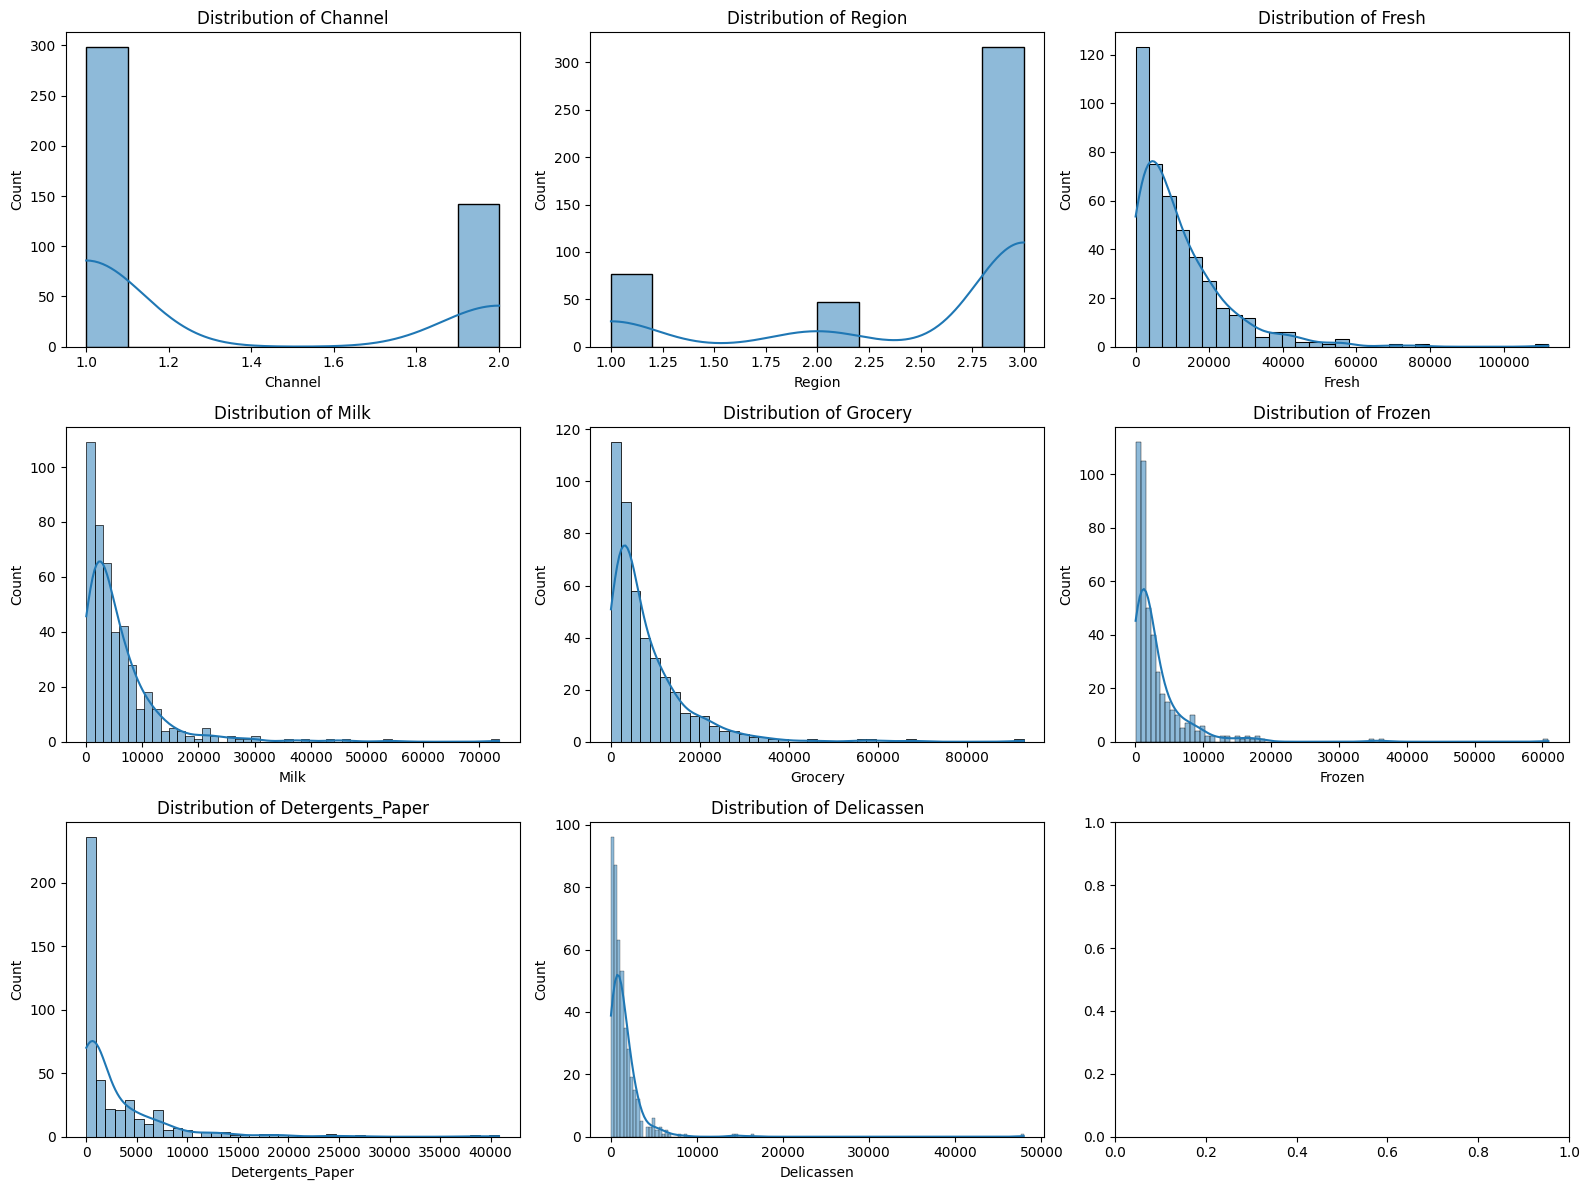

In [158]:
def plot_histograms(dataframe, columns, nrows, ncols):
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, 12))
    axs = axs.flatten()
    for i, col in enumerate(columns):
        sns.histplot(dataframe[col], ax=axs[i], kde=True)
        axs[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Columns to plot
columns = df.columns

# Plot histograms
plot_histograms(df, columns, nrows=3, ncols=3)

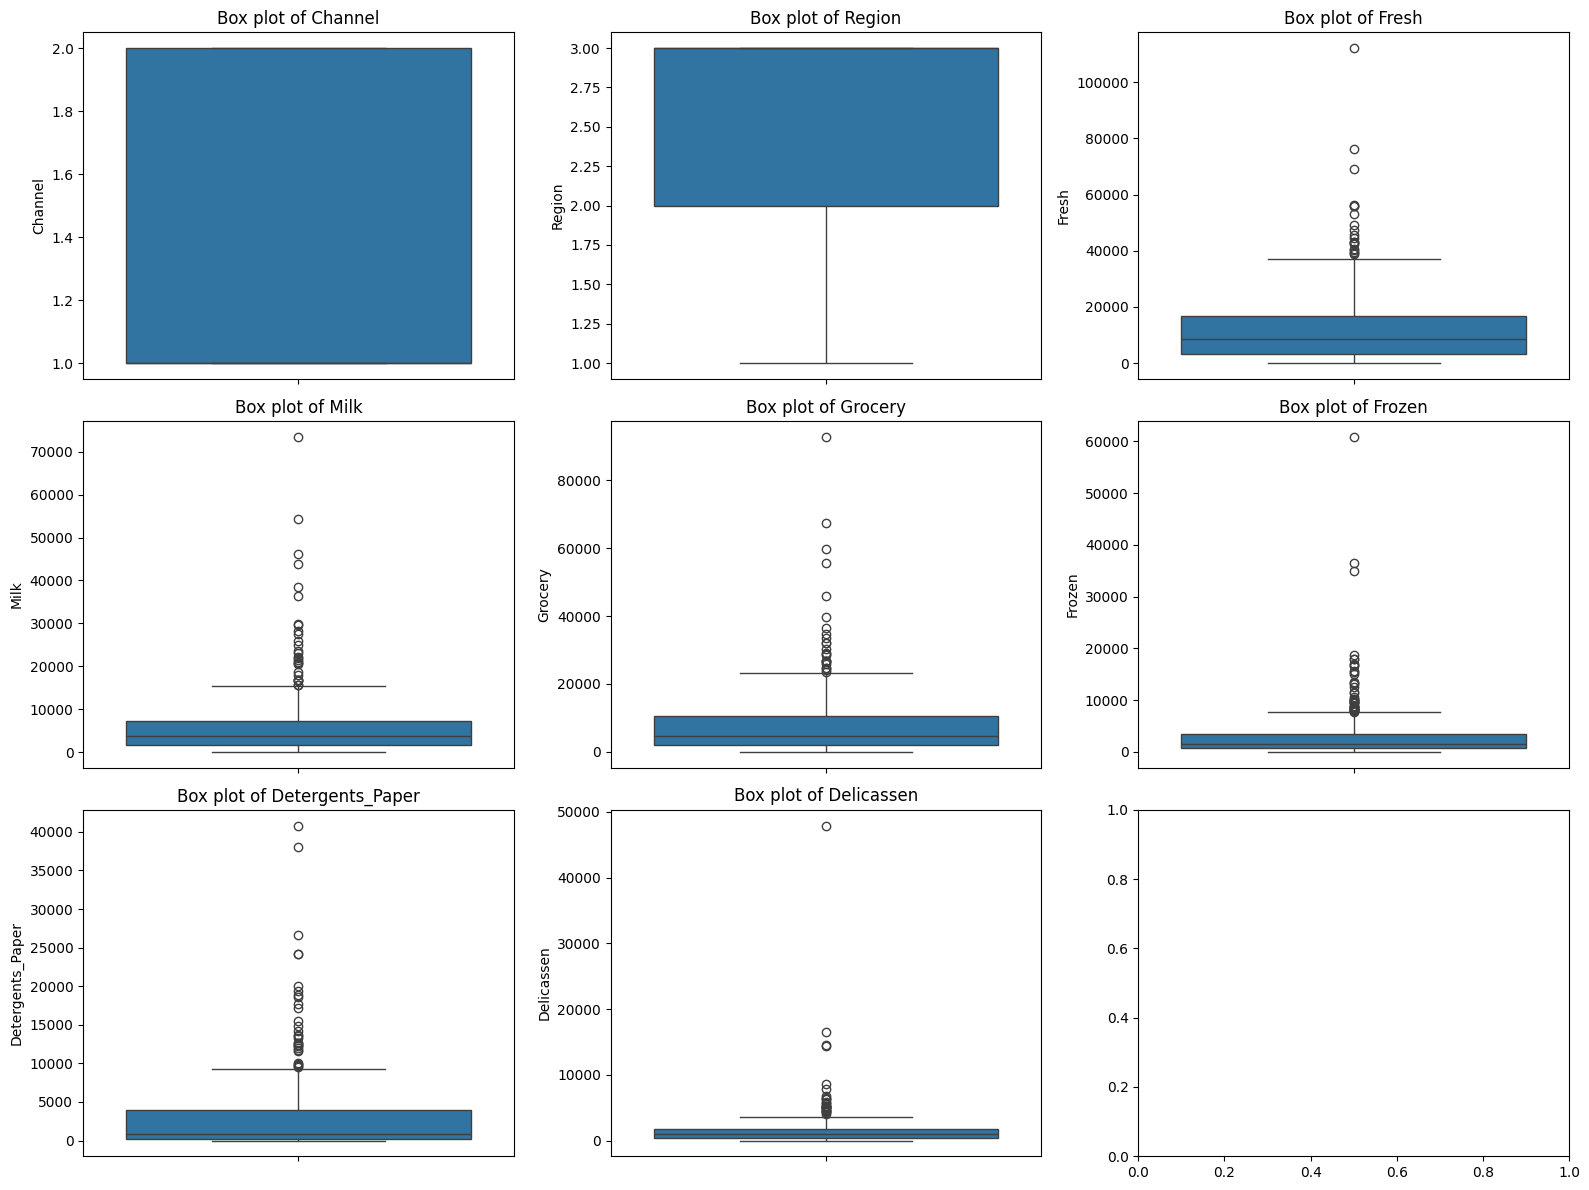

In [ ]:
# Function to plot box plots
def plot_boxplots(dataframe, columns, nrows, ncols):
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, 12))
    axs = axs.flatten()
    for i, col in enumerate(columns):
        sns.boxplot(dataframe[col], ax=axs[i])
        axs[i].set_title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

# Plot box plots
plot_boxplots(df, columns, nrows=3, ncols=3)


In [159]:
# Function to identify outliers using IQR method
def find_outliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))
    return outliers

# Identify outliers in the dataset
outliers = find_outliers(df)
outliers_sum = outliers.sum()

outliers_sum


Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

In [160]:
# Function to remove outliers from the dataset
def remove_outliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

# Remove outliers from the dataset
data_cleaned = remove_outliers(df)

# Display the shape of the dataset before and after removing outliers
df.shape, data_cleaned.shape


((440, 8), (332, 8))

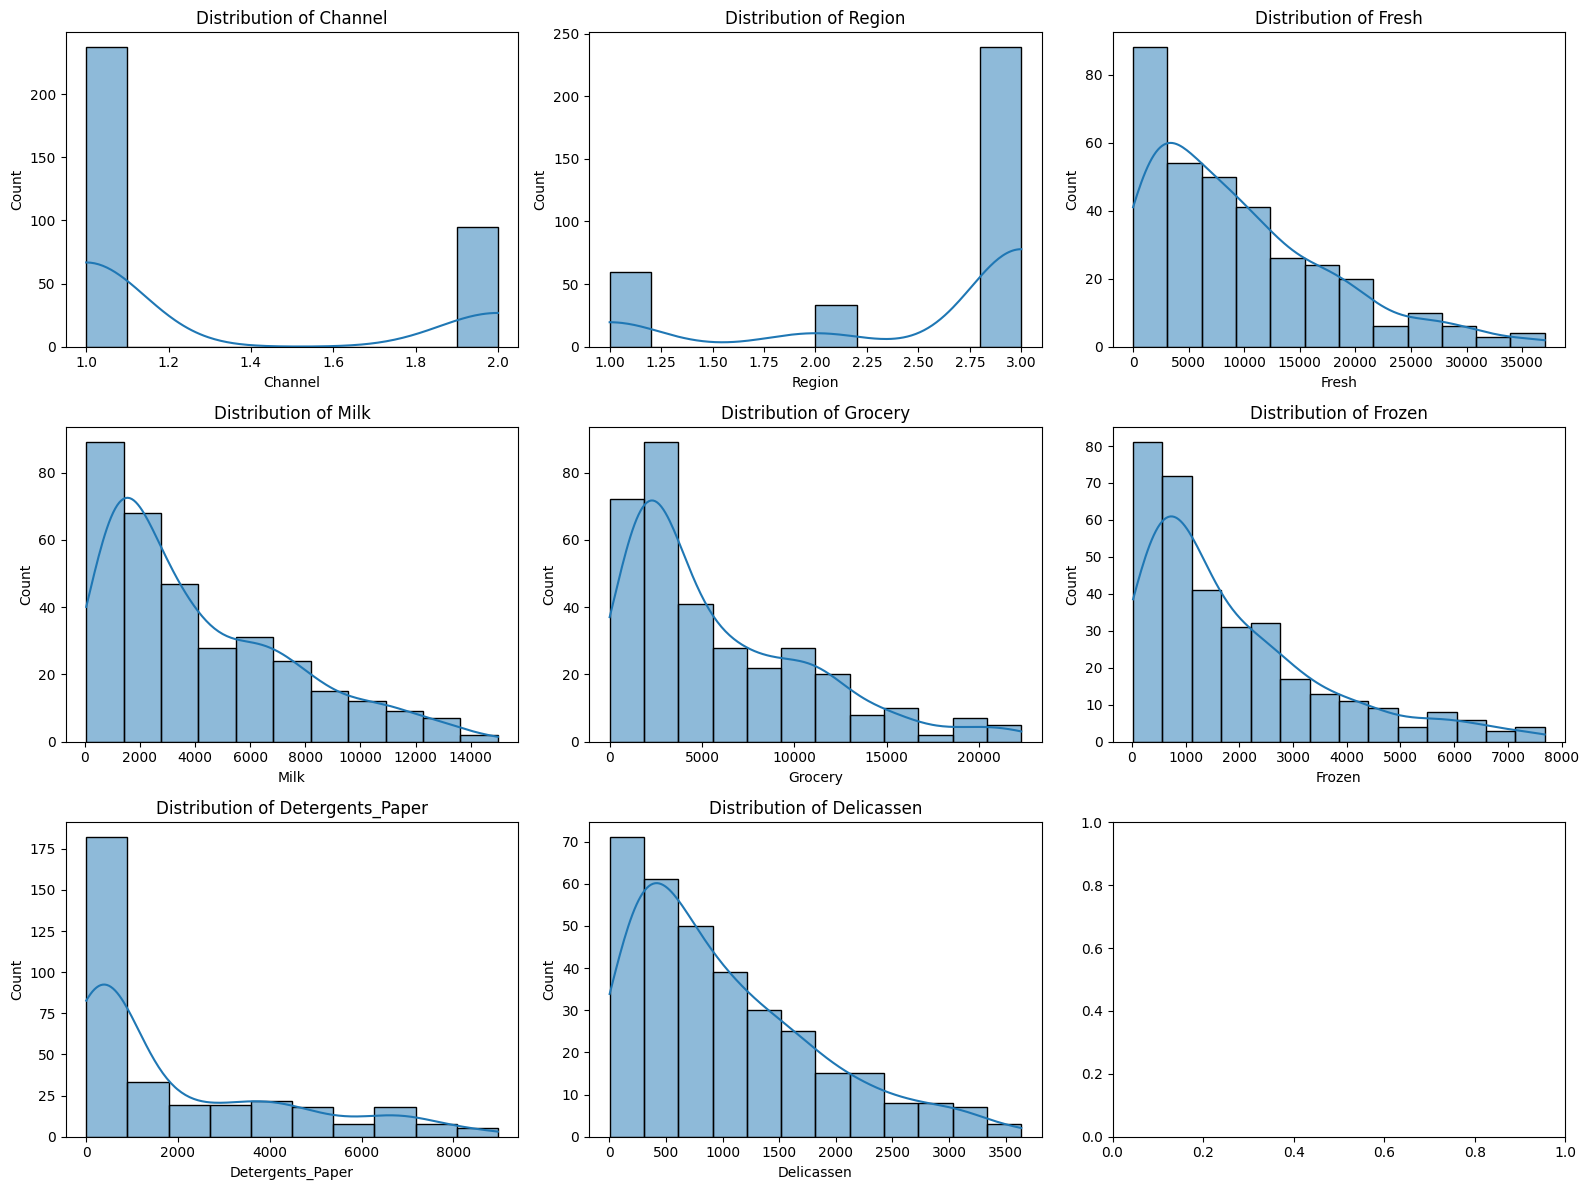

In [ ]:
plot_histograms(data_cleaned, columns, nrows=3, ncols=3)

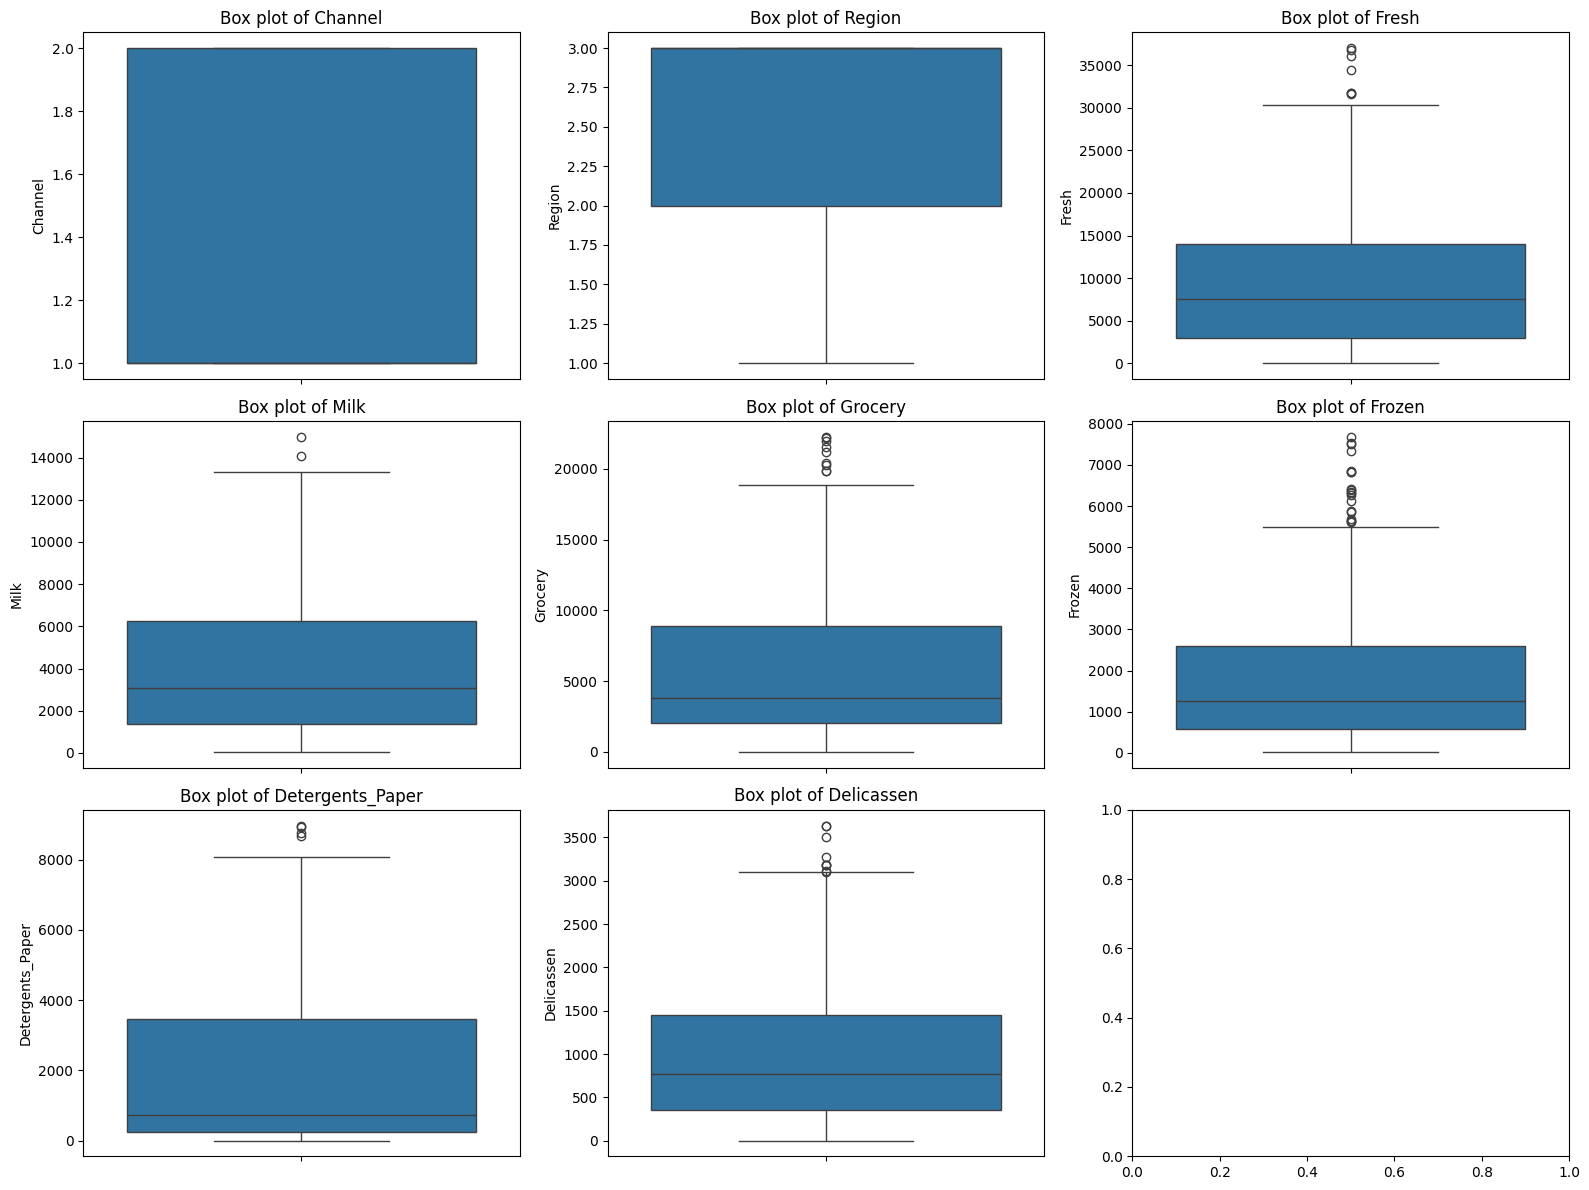

In [ ]:
plot_boxplots(data_cleaned, columns, nrows=3, ncols=3)

In [ ]:
# Ensure all columns have the correct data types
data_cleaned = data_cleaned.astype(int)

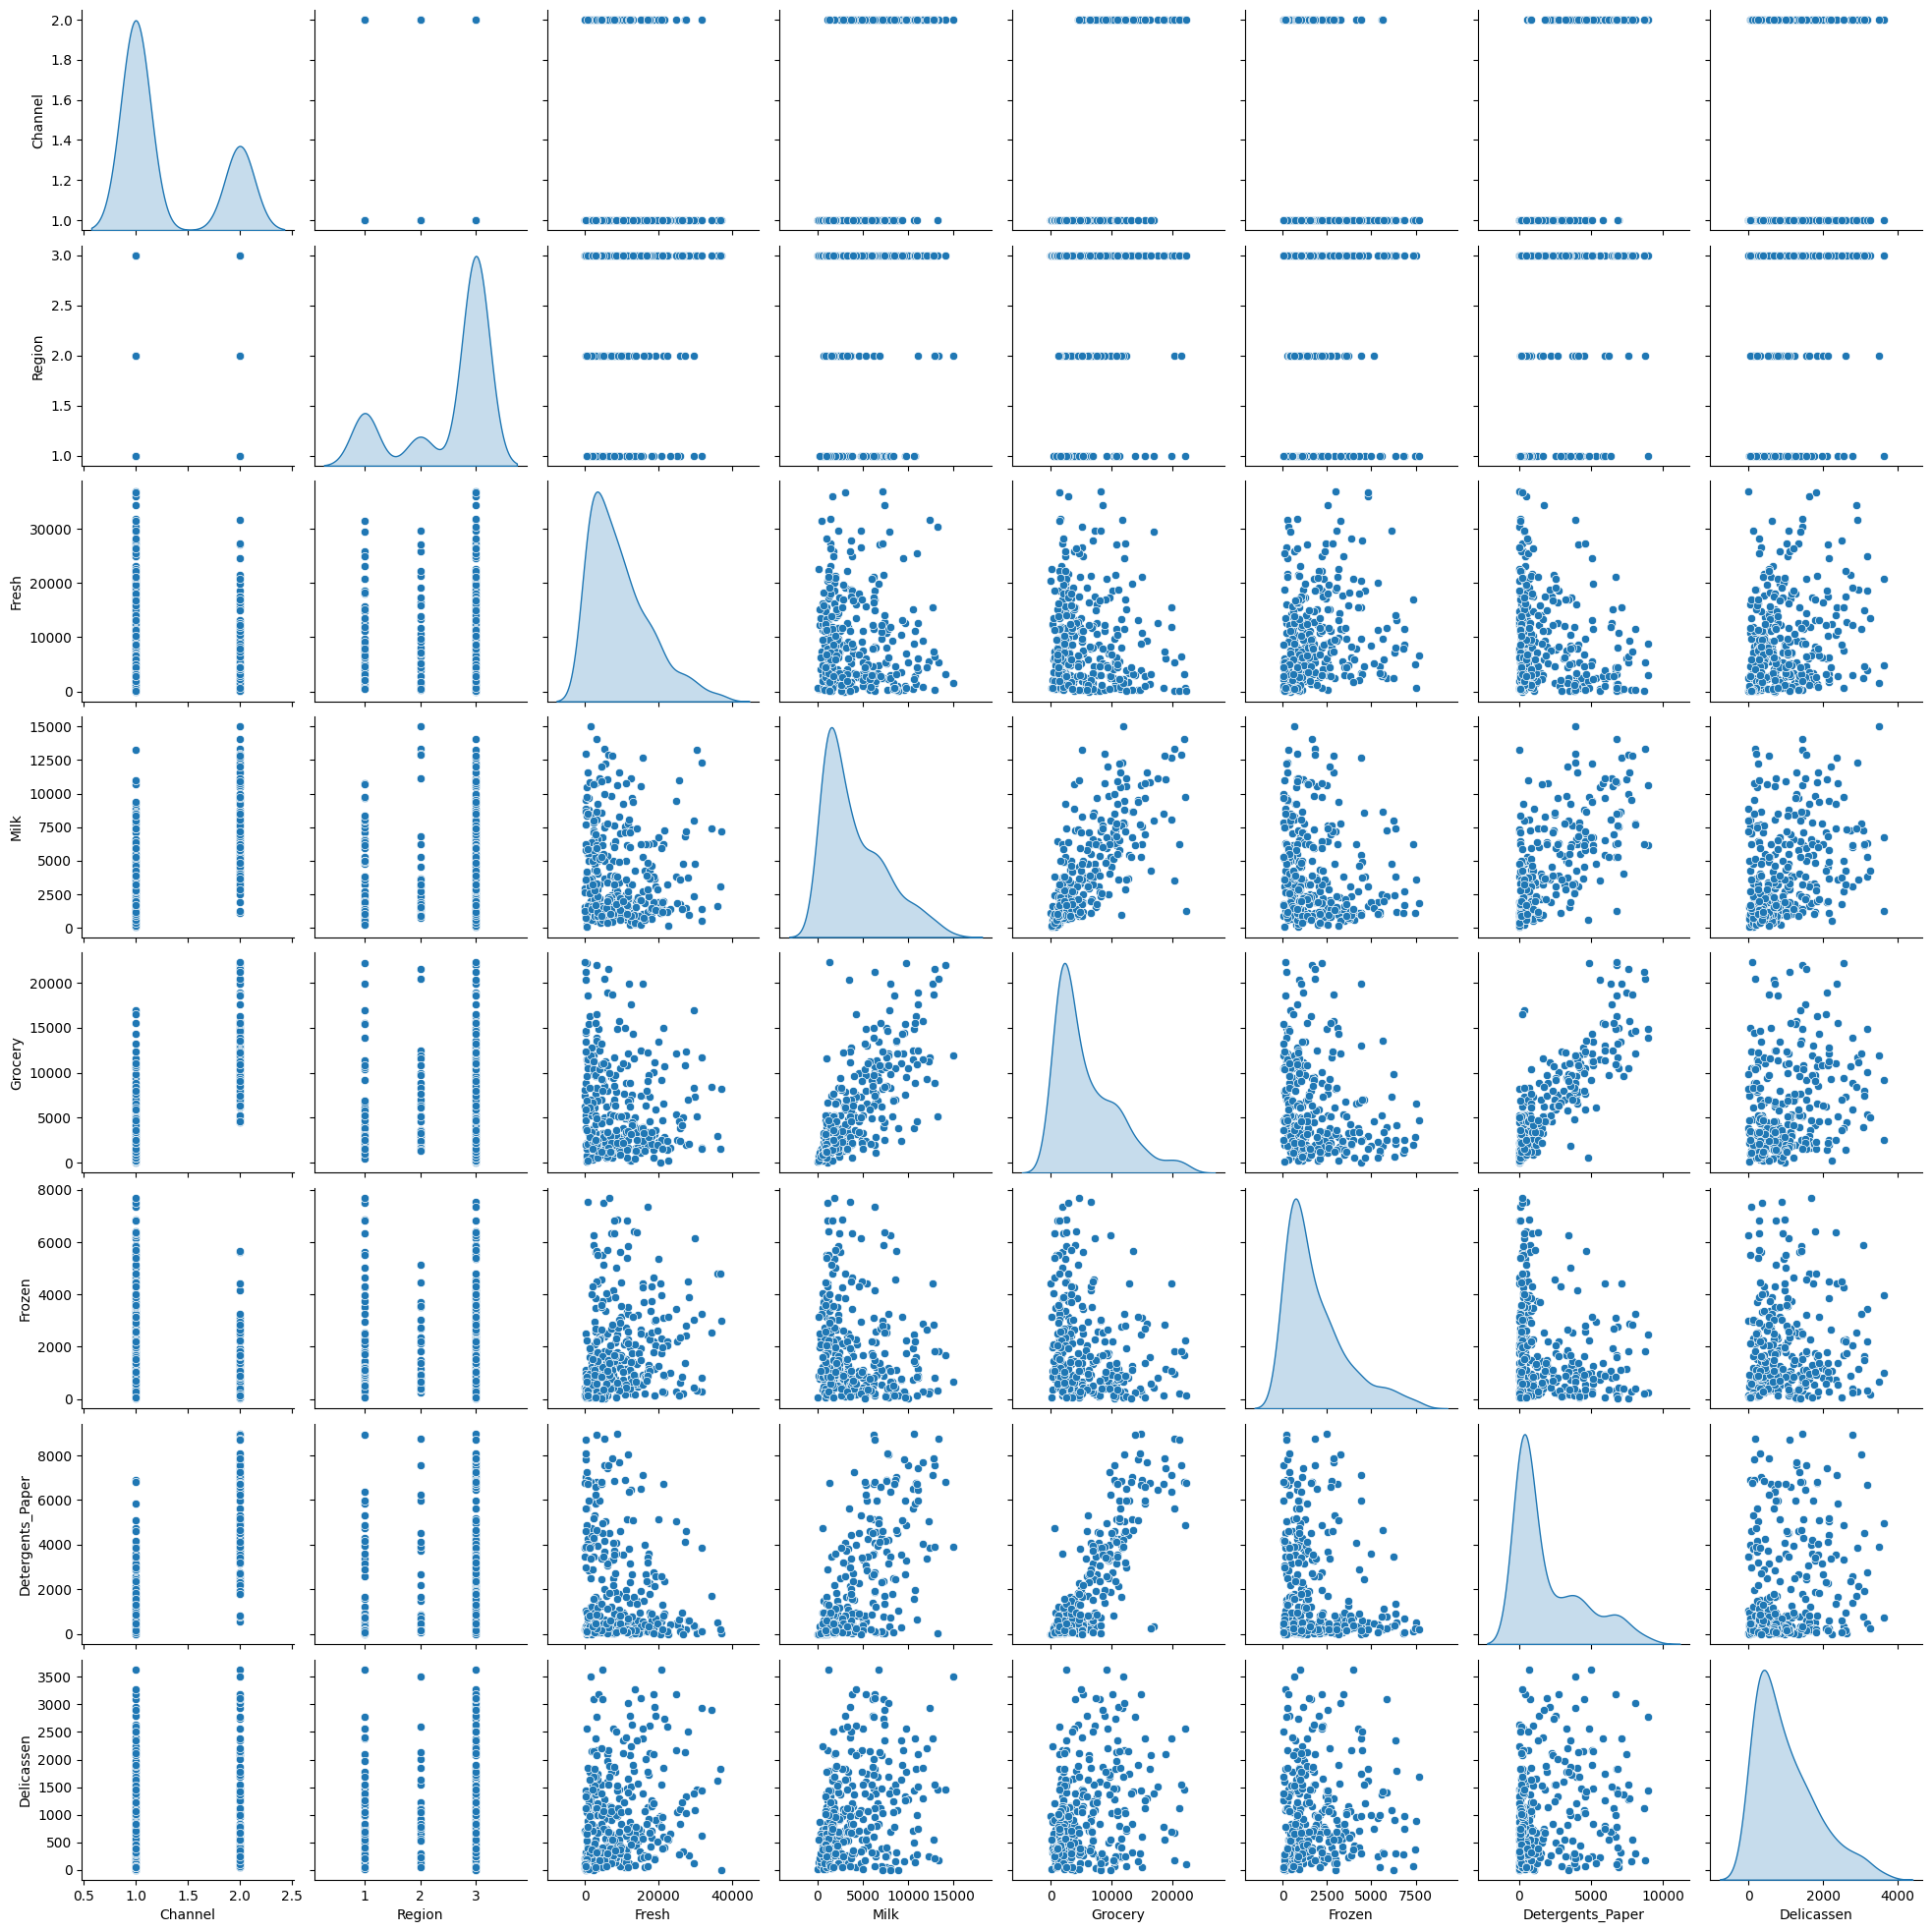

In [ ]:

# Scatter plot matrix
sns.pairplot(data_cleaned, diag_kind='kde')
plt.show()


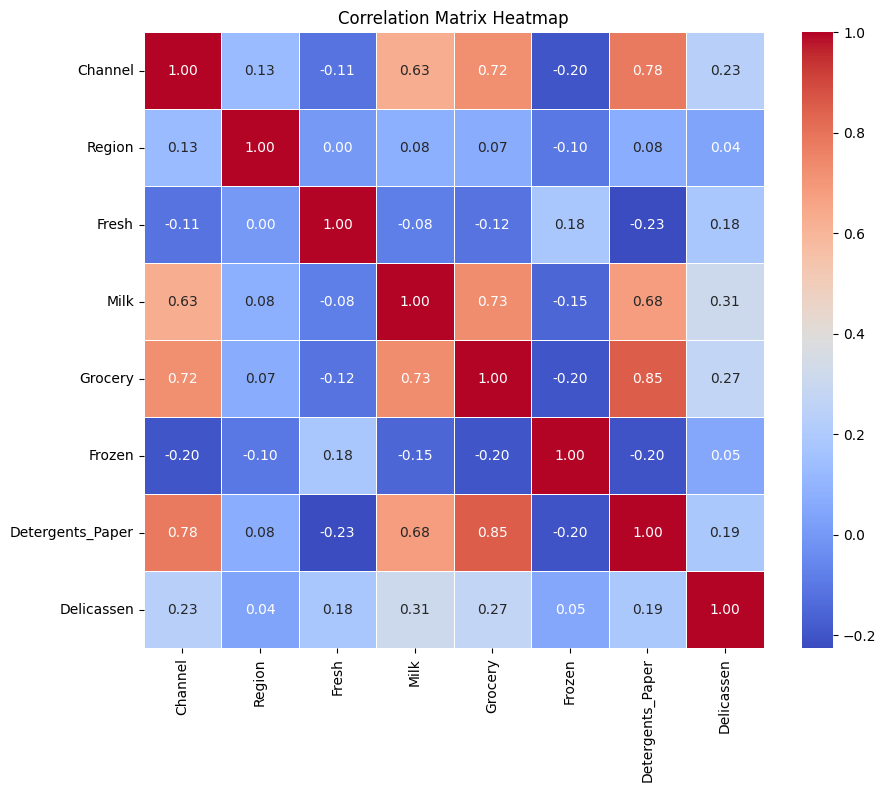

In [ ]:
# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

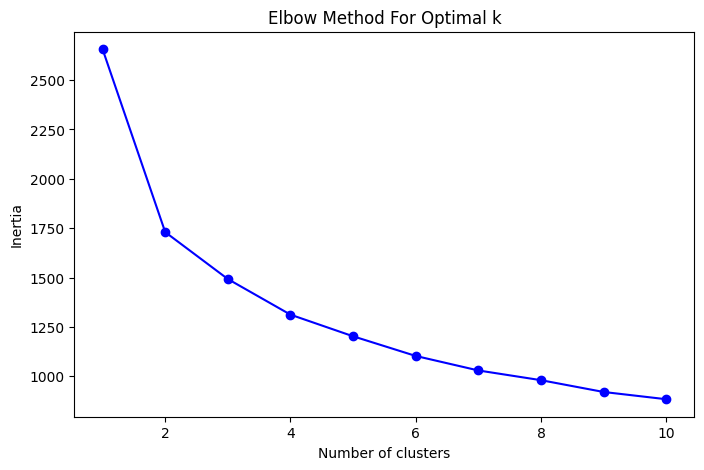

In [163]:
def plot_elbow(data):
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()


plot_elbow(data_scaled)

3 clusters are good fit

In [164]:
import pandas as pd
from sklearn.cluster import KMeans
# Assuming data_scaled is your scaled NumPy array
# And data is the original DataFrame with column names
# Fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Create a new DataFrame from the scaled data, using the original column names
data_kmeans = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Add the cluster labels to the new DataFrame
data_kmeans['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
data_kmeans.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465,1
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591,1
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169,0
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749,1
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949,1


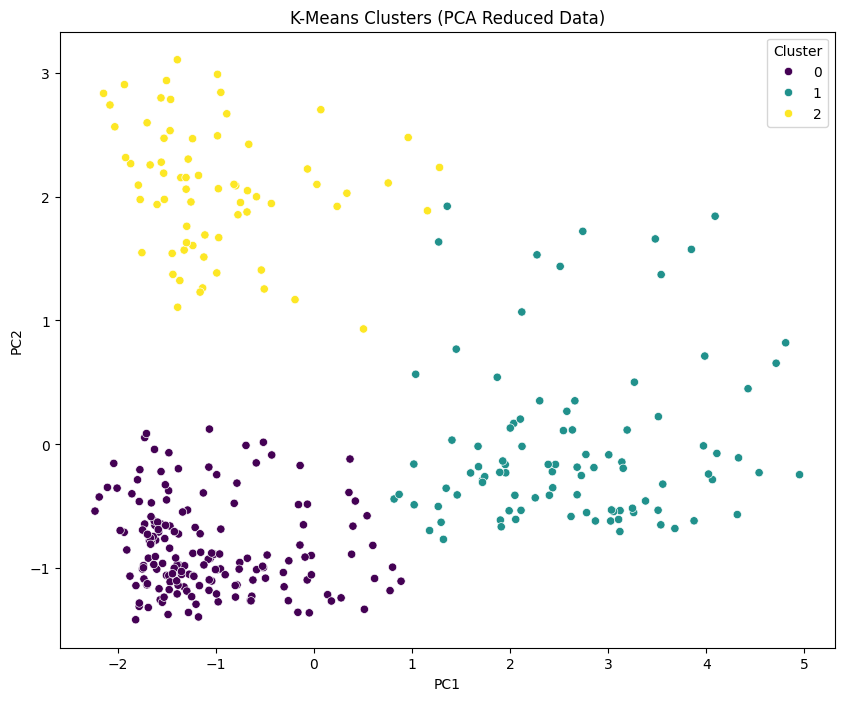

In [165]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_kmeans)

# Create a DataFrame with the PCA data and cluster labels
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clusters (PCA Reduced Data)')
plt.show()


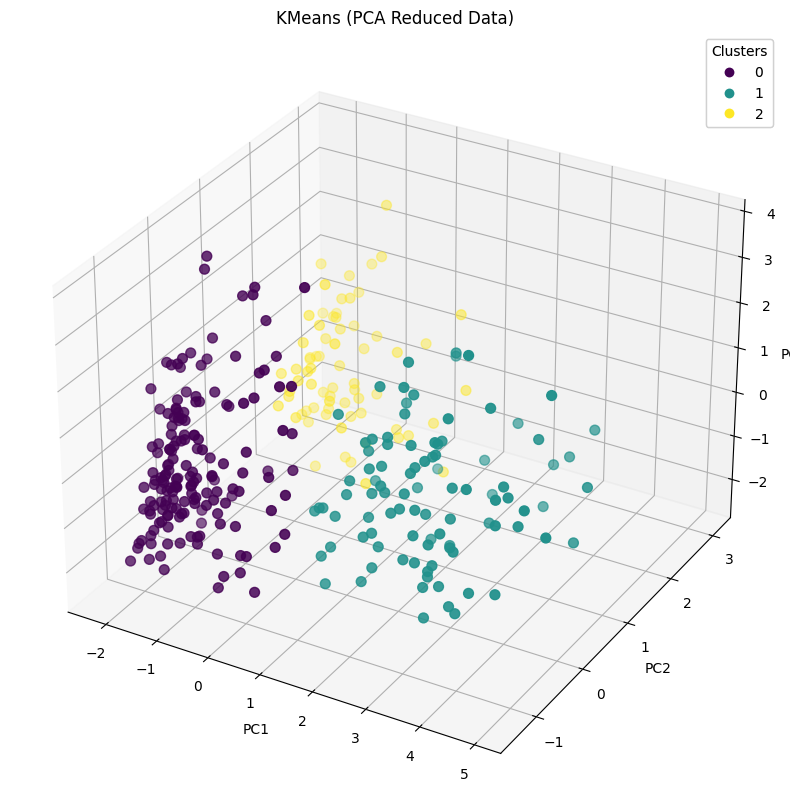

In [166]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions for 3D visualization
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_kmeans)

# Create a DataFrame with the PCA data and cluster labels
pca_df_3d = pd.DataFrame(data=data_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = kmeans.labels_

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['Cluster'], cmap='viridis', s=50)
ax.set_title('KMeans (PCA Reduced Data)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


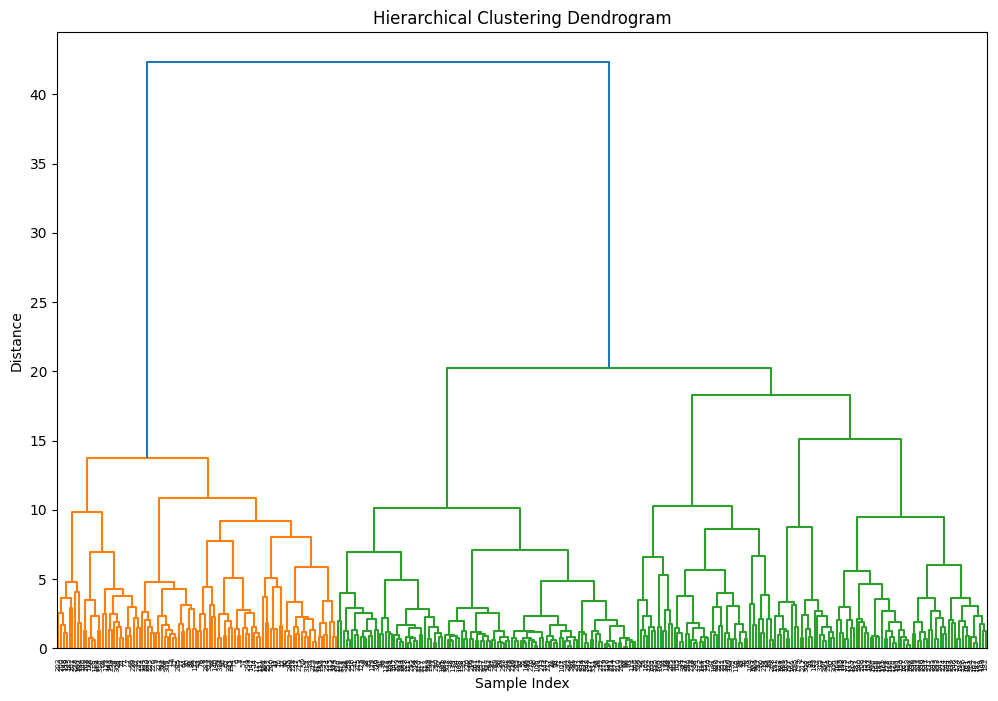

In [167]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


3 clusters also

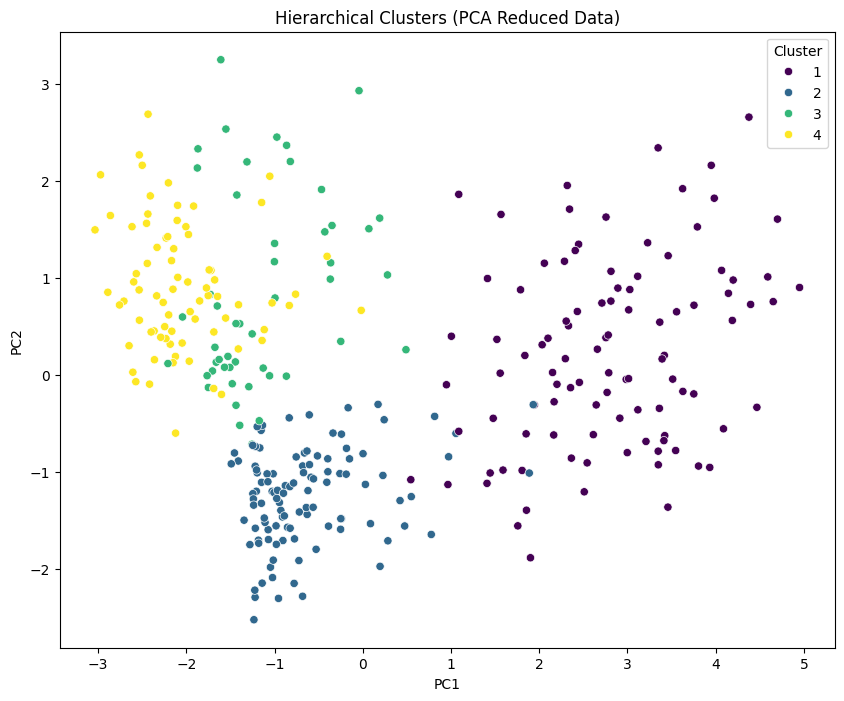

In [168]:
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a cut-off distance
cut_off_distance = 18

# Form clusters
clusters = fcluster(linkage_matrix, cut_off_distance, criterion='distance')
data_hierarchial = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Add the cluster labels to the original data
data_hierarchial['Cluster_Hierarchical'] = clusters

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_hierarchial)

# Create a DataFrame with the PCA data and cluster labels
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Hierarchical Clusters (PCA Reduced Data)')
plt.show()


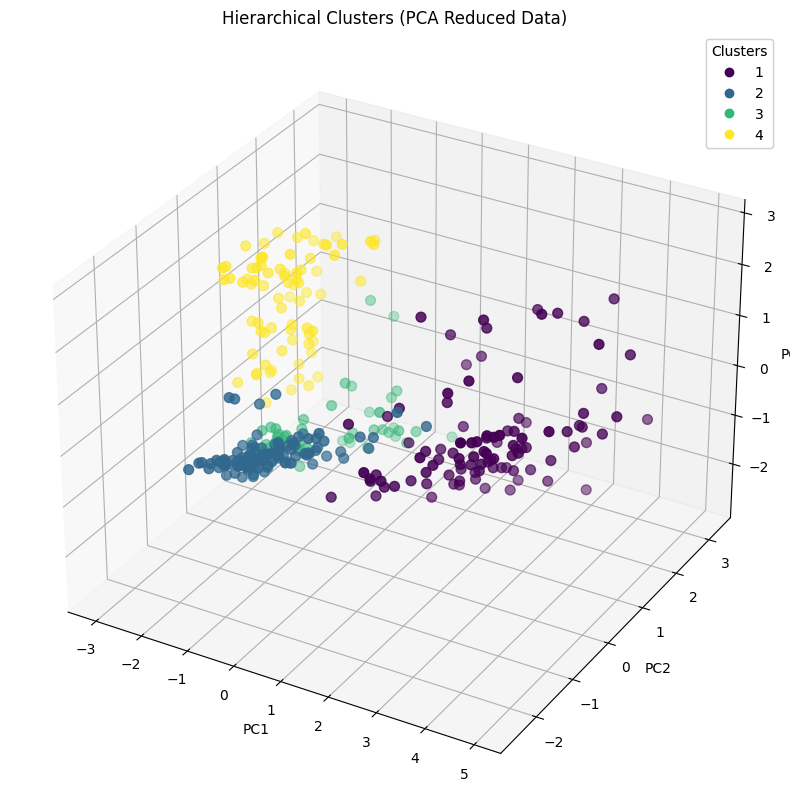

In [169]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions for 3D visualization
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_hierarchial)

# Create a DataFrame with the PCA data and cluster labels
pca_df_3d = pd.DataFrame(data=data_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = clusters

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['Cluster'], cmap='viridis', s=50)
ax.set_title('Hierarchical Clusters (PCA Reduced Data)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [170]:
from sklearn.cluster import DBSCAN

# Fit the DBSCAN model
dbscan = DBSCAN(eps=2, min_samples=5)  # Adjust the parameters as needed
dbscan.fit(data_scaled)
data_DBScan = pd.DataFrame(data_scaled, columns=data_cleaned.columns)
# Add the cluster labels to the original data
data_DBScan['Cluster_DBSCAN'] = dbscan.labels_

# Display the first few rows with DBSCAN cluster labels
data_DBScan.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_DBSCAN
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465,0
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591,0
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169,1
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749,0
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949,0


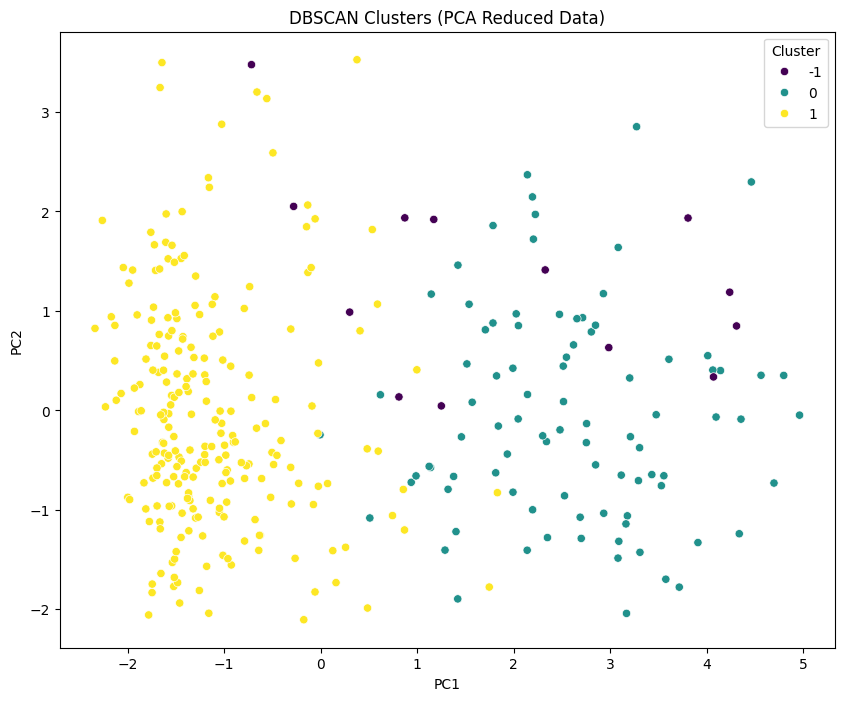

In [171]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_DBScan)

# Create a DataFrame with the PCA data and cluster labels
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = dbscan.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clusters (PCA Reduced Data)')
plt.show()


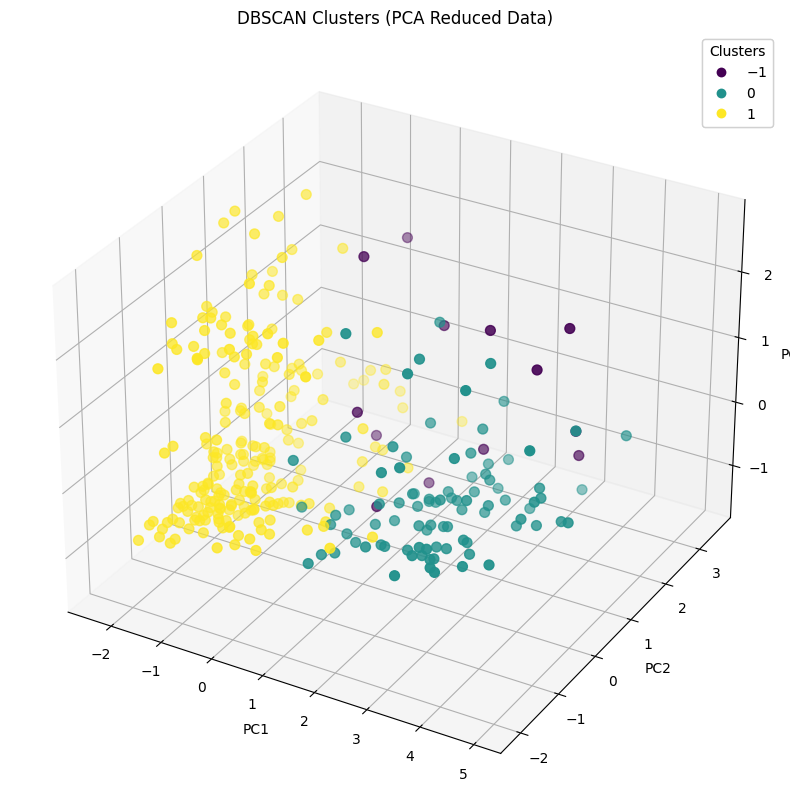

In [172]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions for 3D visualization
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_DBScan)

# Create a DataFrame with the PCA data and cluster labels
pca_df_3d = pd.DataFrame(data=data_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = dbscan.labels_

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['Cluster'], cmap='viridis', s=50)
ax.set_title('DBSCAN Clusters (PCA Reduced Data)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [173]:
from sklearn_extra.cluster import KMedoids

# Fit the K-Medoids model
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(data_scaled)
data_kmedoids = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Add the cluster labels to the original data
data_kmedoids['Cluster_KMedoids'] = kmedoids.labels_

# Display the first few rows with K-Medoids cluster labels
data_kmedoids.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_KMedoids
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465,2
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591,2
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169,1
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749,2
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949,2


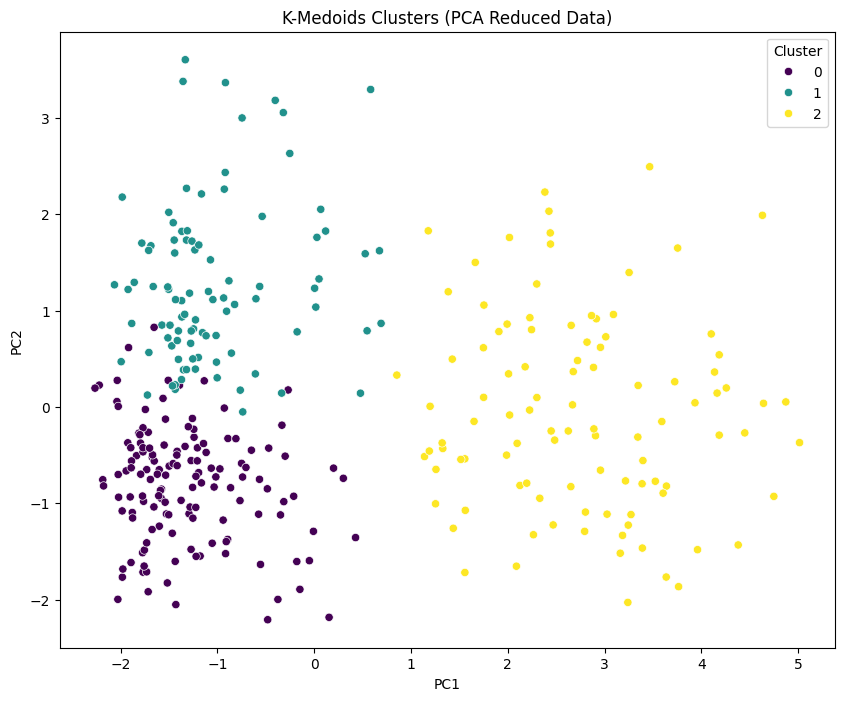

In [174]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_kmedoids)

# Create a DataFrame with the PCA data and cluster labels
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmedoids.labels_

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Medoids Clusters (PCA Reduced Data)')
plt.show()


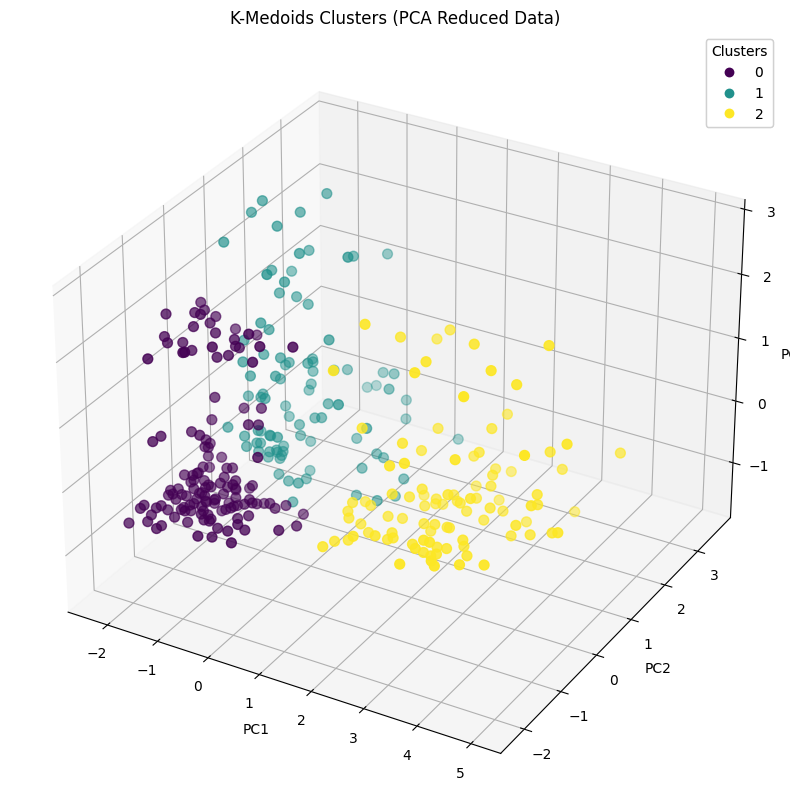

In [175]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions for 3D visualization
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_kmedoids)

# Create a DataFrame with the PCA data and cluster labels
pca_df_3d = pd.DataFrame(data=data_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = kmedoids.labels_

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['Cluster'], cmap='viridis', s=50)
ax.set_title('K-Medoids Clusters (PCA Reduced Data)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


When reduced to 3 dimensions, all of them had good results and separations, except DBScan which was not good in 2 or 3 dimensions, Kmedoids and Kmeans were separated well in 2D and 3D.